In [15]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

from tensorflow.keras.utils import plot_model
import pydot

## 1. Functional API vs Sequential API

In [21]:
mnist = tf.keras.datasets.fashion_mnist

In [2]:
input1 = Input(shape = (28,28))

In [4]:
x = Flatten()(input1)
x = Dense(128, activation ='relu')(x)
predictions = Dense(10, activation ='softmax')(x)

In [8]:
func_model = Model(inputs =input1, outputs = predictions)

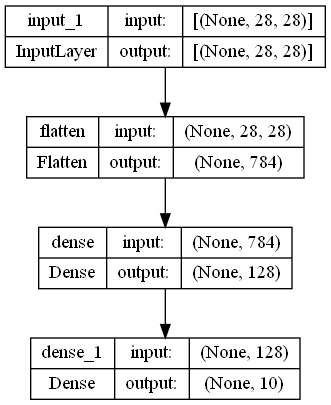

In [14]:
plot_model(func_model, show_shapes=True, show_layer_names=True)

In [19]:
seq_model = tf.keras.models.Sequential()

seq_model.add(Flatten(input_shape=(28,28)))
seq_model.add(Dense(128, activation ='relu'))
seq_model.add(Dense(10, activation ='softmax'))

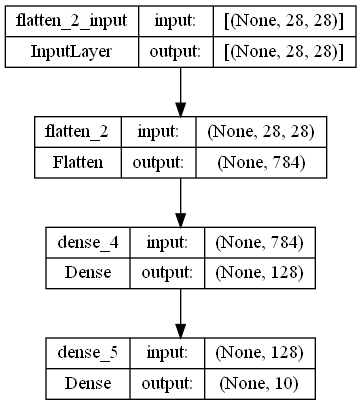

In [20]:
plot_model(seq_model, show_shapes=True, show_layer_names=True)

## 2. Multi-output model for energy efficiency dataset

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_excel('ENB2012_data.xlsx')

In [24]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [26]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [27]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.71,710.5,269.5,220.5,3.5,5,0.40,4,14.66,17.74
1,0.86,588.0,294.0,147.0,7.0,3,0.25,5,29.09,29.43
2,0.69,735.0,294.0,220.5,3.5,3,0.40,2,14.71,17.01
3,0.86,588.0,294.0,147.0,7.0,5,0.10,1,25.27,31.73
4,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57,43.86
...,...,...,...,...,...,...,...,...,...,...
763,0.62,808.5,367.5,220.5,3.5,2,0.10,3,12.68,14.09
764,0.62,808.5,367.5,220.5,3.5,2,0.10,1,12.96,14.34
765,0.62,808.5,367.5,220.5,3.5,5,0.10,1,13.02,14.27
766,0.86,588.0,294.0,147.0,7.0,2,0.40,5,32.31,29.69


In [38]:
# split the data into train and test set
train, test = train_test_split(df, test_size=0.2)

In [29]:
train_stats = train.describe()

In [32]:
train_stats.pop('Y1')
train_stats.pop('Y2')

count    614.000000
mean      24.486466
std        9.569732
min       10.900000
25%       15.440000
50%       21.540000
75%       33.167500
max       48.030000
Name: Y2, dtype: float64

In [33]:
train_stats = train_stats.transpose()

In [35]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1,y2

In [39]:
train_Y = format_output(train)
test_Y = format_output(test)

In [40]:
train_stats

,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.763404,0.104906,0.62,0.69,0.74,0.82,0.98
X2,614.0,672.153909,87.231099,514.50,612.50,686.00,735.00,808.50
X3,614.0,318.220684,44.572637,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.966612,45.345941,110.25,122.50,220.50,220.50,220.50
X5,614.0,5.227199,1.751278,3.50,3.50,3.50,7.00,7.00
X6,614.0,3.511401,1.126154,2.00,2.25,4.00,5.00,5.00
X7,614.0,0.235831,0.132529,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.835505,1.529688,0.00,2.00,3.00,4.00,5.00


In [41]:
# Normalize the training and test data
def norm(x):
    return(x - train_stats['mean']/train_stats['std'])

In [43]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8
447,0.66,759.5,318.5,220.50,3.5,5,0.40,1
398,0.62,808.5,367.5,220.50,3.5,2,0.25,4
645,0.64,784.0,343.0,220.50,3.5,3,0.40,2
73,0.98,514.5,294.0,110.25,7.0,2,0.10,2
373,0.82,612.5,318.5,147.00,7.0,3,0.10,3


In [44]:
norm_train_X = norm(train)
norm_test_X = norm(test)

In [45]:
norm_train_X

,X1,X2,X3,X4,X5,X6,X7,X8
447,-6.617052,751.794561,311.360627,216.59741,0.515209,1.881953,-1.379461,-0.85365
398,-6.657052,800.794561,360.360627,216.59741,0.515209,-1.118047,-1.529461,2.14635
645,-6.637052,776.294561,335.860627,216.59741,0.515209,-0.118047,-1.379461,0.14635
73,-6.297052,506.794561,286.860627,106.34741,4.015209,-1.118047,-1.679461,0.14635
373,-6.457052,604.794561,311.360627,143.09741,4.015209,-0.118047,-1.679461,1.14635
...,...,...,...,...,...,...,...,...
589,-6.657052,800.794561,360.360627,216.59741,0.515209,0.881953,-1.379461,-0.85365
452,-6.637052,776.294561,335.860627,216.59741,0.515209,1.881953,-1.379461,3.14635
530,-6.457052,604.794561,311.360627,143.09741,4.015209,-1.118047,-1.679461,1.14635
420,-6.297052,506.794561,286.860627,106.34741,4.015209,-0.118047,-1.379461,3.14635


In [52]:
# Build the model
input_layer = Input(shape = (len(train.columns),), name = 'input_layer')
dense1 = Dense(units=128, activation='relu', name = 'dense1')(input_layer)
dense2 = Dense(units=128, activation='relu', name = 'dense2')(dense1)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units=1, name = 'y1_output')(dense2)

# Y2 output will come via the third dense
dense3 = Dense(units=128, activation='relu', name = 'dense3')(dense2)
y2_output = Dense(units=1, name='y2_output')(dense3)

# define the model
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

In [53]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 8)]          0           []                               
                                                                                                  
 dense1 (Dense)                 (None, 128)          1152        ['input_layer[0][0]']            
                                                                                                  
 dense2 (Dense)                 (None, 128)          16512       ['dense1[0][0]']                 
                                                                                                  
 dense3 (Dense)                 (None, 128)          16512       ['dense2[0][0]']                 
                                                                                            

In [59]:
# Specify the optimizer, and compile the model with loss functions for both outputs
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss ={'y1_output':'mse', 'y2_output':'mse'},
              metrics = {'y1_output':tf.keras.metrics.mean_absolute_percentage_error, 'y2_output':tf.keras.metrics.mean_absolute_percentage_error})

In [60]:
# train the model
history = model.fit(norm_train_X, train_Y, epochs = 500, batch_size = 10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 3ms/step - loss: 32.0668 - y1_output_loss: 17.2088 - y2_output_loss: 14.8580 - y1_output_mean_absolute_percentage_error: 16.7363 - y2_output_mean_absolute_percentage_error: 12.4265 - val_loss: 30.0277 - val_y1_output_loss: 14.7303 - val_y2_output_loss: 15.2974 - val_y1_output_mean_absolute_percentage_error: 15.1588 - val_y2_output_mean_absolute_percentage_error: 12.6176
Epoch 2/500
62/62 [==============================] - 0s 1ms/step - loss: 27.6236 - y1_output_loss: 15.3139 - y2_output_loss: 12.3097 - y1_output_mean_absolute_percentage_error: 15.4638 - y2_output_mean_absolute_percentage_error: 11.4014 - val_loss: 26.9926 - val_y1_output_loss: 13.1927 - val_y2_output_loss: 13.8000 - val_y1_output_mean_absolute_percentage_error: 14.0670 - val_y2_output_mean_absolute_percentage_error: 12.1838
Epoch 3/500
62/62 [==============================] - 0s 1ms/step - loss: 31.9374 - y1_output_loss: 17.4584 - y2_output_loss: 14.4790 - y1_outp

62/62 [==============================] - 0s 1ms/step - loss: 27.8352 - y1_output_loss: 15.4150 - y2_output_loss: 12.4202 - y1_output_mean_absolute_percentage_error: 15.4119 - y2_output_mean_absolute_percentage_error: 11.1815 - val_loss: 28.1957 - val_y1_output_loss: 14.4215 - val_y2_output_loss: 13.7742 - val_y1_output_mean_absolute_percentage_error: 15.4102 - val_y2_output_mean_absolute_percentage_error: 11.8318
Epoch 21/500
62/62 [==============================] - 0s 1ms/step - loss: 25.2791 - y1_output_loss: 13.5516 - y2_output_loss: 11.7275 - y1_output_mean_absolute_percentage_error: 15.0069 - y2_output_mean_absolute_percentage_error: 11.2238 - val_loss: 26.8414 - val_y1_output_loss: 13.4309 - val_y2_output_loss: 13.4104 - val_y1_output_mean_absolute_percentage_error: 14.1849 - val_y2_output_mean_absolute_percentage_error: 11.3209
Epoch 22/500
62/62 [==============================] - 0s 1ms/step - loss: 25.7569 - y1_output_loss: 14.2028 - y2_output_loss: 11.5541 - y1_output_mean_ab

62/62 [==============================] - 0s 1ms/step - loss: 25.6470 - y1_output_loss: 13.8724 - y2_output_loss: 11.7745 - y1_output_mean_absolute_percentage_error: 14.7356 - y2_output_mean_absolute_percentage_error: 11.0136 - val_loss: 25.4192 - val_y1_output_loss: 12.6018 - val_y2_output_loss: 12.8174 - val_y1_output_mean_absolute_percentage_error: 13.9875 - val_y2_output_mean_absolute_percentage_error: 11.1198
Epoch 40/500
62/62 [==============================] - 0s 1ms/step - loss: 25.0845 - y1_output_loss: 13.5197 - y2_output_loss: 11.5648 - y1_output_mean_absolute_percentage_error: 14.4268 - y2_output_mean_absolute_percentage_error: 10.7711 - val_loss: 25.3489 - val_y1_output_loss: 12.5816 - val_y2_output_loss: 12.7674 - val_y1_output_mean_absolute_percentage_error: 14.3650 - val_y2_output_mean_absolute_percentage_error: 11.3103
Epoch 41/500
62/62 [==============================] - 0s 1ms/step - loss: 27.8864 - y1_output_loss: 15.0542 - y2_output_loss: 12.8321 - y1_output_mean_ab

62/62 [==============================] - 0s 1ms/step - loss: 23.8087 - y1_output_loss: 12.8544 - y2_output_loss: 10.9543 - y1_output_mean_absolute_percentage_error: 14.1420 - y2_output_mean_absolute_percentage_error: 10.8351 - val_loss: 26.0829 - val_y1_output_loss: 12.5764 - val_y2_output_loss: 13.5066 - val_y1_output_mean_absolute_percentage_error: 13.8286 - val_y2_output_mean_absolute_percentage_error: 10.9495
Epoch 59/500
62/62 [==============================] - 0s 1ms/step - loss: 26.0270 - y1_output_loss: 13.7580 - y2_output_loss: 12.2690 - y1_output_mean_absolute_percentage_error: 14.2749 - y2_output_mean_absolute_percentage_error: 11.3174 - val_loss: 28.2251 - val_y1_output_loss: 14.1539 - val_y2_output_loss: 14.0712 - val_y1_output_mean_absolute_percentage_error: 14.3879 - val_y2_output_mean_absolute_percentage_error: 11.5705
Epoch 60/500
62/62 [==============================] - 0s 1ms/step - loss: 24.8565 - y1_output_loss: 13.3994 - y2_output_loss: 11.4571 - y1_output_mean_ab

62/62 [==============================] - 0s 1ms/step - loss: 24.3416 - y1_output_loss: 13.5773 - y2_output_loss: 10.7643 - y1_output_mean_absolute_percentage_error: 14.2172 - y2_output_mean_absolute_percentage_error: 10.3565 - val_loss: 41.6953 - val_y1_output_loss: 18.0589 - val_y2_output_loss: 23.6364 - val_y1_output_mean_absolute_percentage_error: 15.1214 - val_y2_output_mean_absolute_percentage_error: 12.9075
Epoch 78/500
62/62 [==============================] - 0s 1ms/step - loss: 24.2004 - y1_output_loss: 13.5502 - y2_output_loss: 10.6502 - y1_output_mean_absolute_percentage_error: 14.5358 - y2_output_mean_absolute_percentage_error: 10.5205 - val_loss: 26.3025 - val_y1_output_loss: 13.4630 - val_y2_output_loss: 12.8394 - val_y1_output_mean_absolute_percentage_error: 14.2411 - val_y2_output_mean_absolute_percentage_error: 10.9350
Epoch 79/500
62/62 [==============================] - 0s 1ms/step - loss: 23.0678 - y1_output_loss: 13.2139 - y2_output_loss: 9.8539 - y1_output_mean_abs

62/62 [==============================] - 0s 1ms/step - loss: 22.9443 - y1_output_loss: 13.1407 - y2_output_loss: 9.8036 - y1_output_mean_absolute_percentage_error: 14.4814 - y2_output_mean_absolute_percentage_error: 10.2588 - val_loss: 24.0406 - val_y1_output_loss: 12.5116 - val_y2_output_loss: 11.5290 - val_y1_output_mean_absolute_percentage_error: 13.8074 - val_y2_output_mean_absolute_percentage_error: 10.2521
Epoch 97/500
62/62 [==============================] - 0s 1ms/step - loss: 21.2438 - y1_output_loss: 12.5164 - y2_output_loss: 8.7274 - y1_output_mean_absolute_percentage_error: 14.2675 - y2_output_mean_absolute_percentage_error: 9.8190 - val_loss: 29.6133 - val_y1_output_loss: 14.7912 - val_y2_output_loss: 14.8220 - val_y1_output_mean_absolute_percentage_error: 14.4243 - val_y2_output_mean_absolute_percentage_error: 10.9187
Epoch 98/500
62/62 [==============================] - 0s 1ms/step - loss: 23.4405 - y1_output_loss: 13.3182 - y2_output_loss: 10.1222 - y1_output_mean_absol

62/62 [==============================] - 0s 1ms/step - loss: 19.8603 - y1_output_loss: 11.7846 - y2_output_loss: 8.0756 - y1_output_mean_absolute_percentage_error: 13.6760 - y2_output_mean_absolute_percentage_error: 9.3466 - val_loss: 20.9898 - val_y1_output_loss: 11.2663 - val_y2_output_loss: 9.7235 - val_y1_output_mean_absolute_percentage_error: 13.3577 - val_y2_output_mean_absolute_percentage_error: 9.3300
Epoch 116/500
62/62 [==============================] - 0s 1ms/step - loss: 20.0620 - y1_output_loss: 12.3811 - y2_output_loss: 7.6809 - y1_output_mean_absolute_percentage_error: 14.1690 - y2_output_mean_absolute_percentage_error: 9.2266 - val_loss: 39.7022 - val_y1_output_loss: 22.5300 - val_y2_output_loss: 17.1723 - val_y1_output_mean_absolute_percentage_error: 16.1299 - val_y2_output_mean_absolute_percentage_error: 10.9926
Epoch 117/500
62/62 [==============================] - 0s 1ms/step - loss: 21.1615 - y1_output_loss: 12.6246 - y2_output_loss: 8.5369 - y1_output_mean_absolut

62/62 [==============================] - 0s 1ms/step - loss: 19.6143 - y1_output_loss: 11.4739 - y2_output_loss: 8.1404 - y1_output_mean_absolute_percentage_error: 13.8494 - y2_output_mean_absolute_percentage_error: 9.2120 - val_loss: 18.9465 - val_y1_output_loss: 10.7525 - val_y2_output_loss: 8.1940 - val_y1_output_mean_absolute_percentage_error: 13.4720 - val_y2_output_mean_absolute_percentage_error: 9.0711
Epoch 135/500
62/62 [==============================] - 0s 1ms/step - loss: 19.5502 - y1_output_loss: 11.3341 - y2_output_loss: 8.2161 - y1_output_mean_absolute_percentage_error: 13.5470 - y2_output_mean_absolute_percentage_error: 9.1566 - val_loss: 18.2277 - val_y1_output_loss: 10.2488 - val_y2_output_loss: 7.9789 - val_y1_output_mean_absolute_percentage_error: 12.8444 - val_y2_output_mean_absolute_percentage_error: 9.4891
Epoch 136/500
62/62 [==============================] - 0s 1ms/step - loss: 17.8779 - y1_output_loss: 10.7179 - y2_output_loss: 7.1600 - y1_output_mean_absolute_

62/62 [==============================] - 0s 1ms/step - loss: 17.9000 - y1_output_loss: 10.3778 - y2_output_loss: 7.5222 - y1_output_mean_absolute_percentage_error: 13.1806 - y2_output_mean_absolute_percentage_error: 9.0295 - val_loss: 17.5994 - val_y1_output_loss: 9.6303 - val_y2_output_loss: 7.9690 - val_y1_output_mean_absolute_percentage_error: 12.5325 - val_y2_output_mean_absolute_percentage_error: 8.9232
Epoch 154/500
62/62 [==============================] - 0s 1ms/step - loss: 17.1494 - y1_output_loss: 10.1303 - y2_output_loss: 7.0191 - y1_output_mean_absolute_percentage_error: 13.0767 - y2_output_mean_absolute_percentage_error: 8.6707 - val_loss: 16.9492 - val_y1_output_loss: 9.6037 - val_y2_output_loss: 7.3455 - val_y1_output_mean_absolute_percentage_error: 13.0503 - val_y2_output_mean_absolute_percentage_error: 8.5435
Epoch 155/500
62/62 [==============================] - 0s 1ms/step - loss: 16.7219 - y1_output_loss: 10.0171 - y2_output_loss: 6.7047 - y1_output_mean_absolute_pe

62/62 [==============================] - 0s 1ms/step - loss: 16.6073 - y1_output_loss: 9.7099 - y2_output_loss: 6.8975 - y1_output_mean_absolute_percentage_error: 13.0918 - y2_output_mean_absolute_percentage_error: 8.6581 - val_loss: 22.8449 - val_y1_output_loss: 11.6477 - val_y2_output_loss: 11.1972 - val_y1_output_mean_absolute_percentage_error: 13.5049 - val_y2_output_mean_absolute_percentage_error: 10.7338
Epoch 173/500
62/62 [==============================] - 0s 1ms/step - loss: 16.1927 - y1_output_loss: 9.0445 - y2_output_loss: 7.1482 - y1_output_mean_absolute_percentage_error: 12.6080 - y2_output_mean_absolute_percentage_error: 8.7898 - val_loss: 16.4124 - val_y1_output_loss: 8.6196 - val_y2_output_loss: 7.7929 - val_y1_output_mean_absolute_percentage_error: 12.3136 - val_y2_output_mean_absolute_percentage_error: 8.7501
Epoch 174/500
62/62 [==============================] - 0s 1ms/step - loss: 16.0708 - y1_output_loss: 9.1635 - y2_output_loss: 6.9073 - y1_output_mean_absolute_pe

62/62 [==============================] - 0s 1ms/step - loss: 15.4763 - y1_output_loss: 8.9355 - y2_output_loss: 6.5409 - y1_output_mean_absolute_percentage_error: 12.5165 - y2_output_mean_absolute_percentage_error: 8.5520 - val_loss: 15.2003 - val_y1_output_loss: 8.2126 - val_y2_output_loss: 6.9877 - val_y1_output_mean_absolute_percentage_error: 11.9793 - val_y2_output_mean_absolute_percentage_error: 8.2065
Epoch 192/500
62/62 [==============================] - 0s 1ms/step - loss: 14.7756 - y1_output_loss: 8.2821 - y2_output_loss: 6.4935 - y1_output_mean_absolute_percentage_error: 12.2198 - y2_output_mean_absolute_percentage_error: 8.3215 - val_loss: 15.5162 - val_y1_output_loss: 8.6812 - val_y2_output_loss: 6.8350 - val_y1_output_mean_absolute_percentage_error: 12.2549 - val_y2_output_mean_absolute_percentage_error: 8.1779
Epoch 193/500
62/62 [==============================] - 0s 1ms/step - loss: 15.0966 - y1_output_loss: 8.3306 - y2_output_loss: 6.7660 - y1_output_mean_absolute_perce

62/62 [==============================] - 0s 1ms/step - loss: 13.7660 - y1_output_loss: 7.3638 - y2_output_loss: 6.4021 - y1_output_mean_absolute_percentage_error: 11.6990 - y2_output_mean_absolute_percentage_error: 8.1940 - val_loss: 13.6649 - val_y1_output_loss: 6.7073 - val_y2_output_loss: 6.9576 - val_y1_output_mean_absolute_percentage_error: 11.3917 - val_y2_output_mean_absolute_percentage_error: 7.9552
Epoch 211/500
62/62 [==============================] - 0s 1ms/step - loss: 14.0953 - y1_output_loss: 7.8800 - y2_output_loss: 6.2153 - y1_output_mean_absolute_percentage_error: 11.8006 - y2_output_mean_absolute_percentage_error: 8.0559 - val_loss: 13.9222 - val_y1_output_loss: 7.5447 - val_y2_output_loss: 6.3775 - val_y1_output_mean_absolute_percentage_error: 11.5557 - val_y2_output_mean_absolute_percentage_error: 7.9930
Epoch 212/500
62/62 [==============================] - 0s 1ms/step - loss: 14.5876 - y1_output_loss: 7.6022 - y2_output_loss: 6.9853 - y1_output_mean_absolute_perce

62/62 [==============================] - 0s 1ms/step - loss: 11.6221 - y1_output_loss: 6.1110 - y2_output_loss: 5.5111 - y1_output_mean_absolute_percentage_error: 10.6151 - y2_output_mean_absolute_percentage_error: 7.4784 - val_loss: 12.0493 - val_y1_output_loss: 5.8661 - val_y2_output_loss: 6.1832 - val_y1_output_mean_absolute_percentage_error: 10.0807 - val_y2_output_mean_absolute_percentage_error: 7.3829
Epoch 230/500
62/62 [==============================] - 0s 1ms/step - loss: 11.8805 - y1_output_loss: 6.8362 - y2_output_loss: 5.0443 - y1_output_mean_absolute_percentage_error: 10.8872 - y2_output_mean_absolute_percentage_error: 7.4602 - val_loss: 14.9032 - val_y1_output_loss: 7.7514 - val_y2_output_loss: 7.1518 - val_y1_output_mean_absolute_percentage_error: 11.2073 - val_y2_output_mean_absolute_percentage_error: 8.0544
Epoch 231/500
62/62 [==============================] - 0s 1ms/step - loss: 11.3457 - y1_output_loss: 5.9881 - y2_output_loss: 5.3576 - y1_output_mean_absolute_perce

62/62 [==============================] - 0s 1ms/step - loss: 12.0749 - y1_output_loss: 6.5009 - y2_output_loss: 5.5740 - y1_output_mean_absolute_percentage_error: 10.3176 - y2_output_mean_absolute_percentage_error: 7.4855 - val_loss: 12.0514 - val_y1_output_loss: 6.1575 - val_y2_output_loss: 5.8939 - val_y1_output_mean_absolute_percentage_error: 10.6434 - val_y2_output_mean_absolute_percentage_error: 7.6181
Epoch 249/500
62/62 [==============================] - 0s 1ms/step - loss: 12.7694 - y1_output_loss: 6.5889 - y2_output_loss: 6.1805 - y1_output_mean_absolute_percentage_error: 10.3131 - y2_output_mean_absolute_percentage_error: 7.7875 - val_loss: 10.2819 - val_y1_output_loss: 4.8340 - val_y2_output_loss: 5.4479 - val_y1_output_mean_absolute_percentage_error: 9.4953 - val_y2_output_mean_absolute_percentage_error: 7.0755
Epoch 250/500
62/62 [==============================] - 0s 1ms/step - loss: 9.5024 - y1_output_loss: 4.6795 - y2_output_loss: 4.8229 - y1_output_mean_absolute_percent

62/62 [==============================] - 0s 1ms/step - loss: 8.6764 - y1_output_loss: 4.1215 - y2_output_loss: 4.5549 - y1_output_mean_absolute_percentage_error: 8.7979 - y2_output_mean_absolute_percentage_error: 6.7175 - val_loss: 9.4205 - val_y1_output_loss: 4.4860 - val_y2_output_loss: 4.9345 - val_y1_output_mean_absolute_percentage_error: 8.4538 - val_y2_output_mean_absolute_percentage_error: 6.2772
Epoch 268/500
62/62 [==============================] - 0s 1ms/step - loss: 10.3682 - y1_output_loss: 5.1798 - y2_output_loss: 5.1884 - y1_output_mean_absolute_percentage_error: 9.3703 - y2_output_mean_absolute_percentage_error: 7.1855 - val_loss: 10.3582 - val_y1_output_loss: 4.4062 - val_y2_output_loss: 5.9519 - val_y1_output_mean_absolute_percentage_error: 8.3700 - val_y2_output_mean_absolute_percentage_error: 7.1656
Epoch 269/500
62/62 [==============================] - 0s 1ms/step - loss: 8.6345 - y1_output_loss: 4.0710 - y2_output_loss: 4.5635 - y1_output_mean_absolute_percentage_e

62/62 [==============================] - 0s 1ms/step - loss: 9.0828 - y1_output_loss: 4.2966 - y2_output_loss: 4.7862 - y1_output_mean_absolute_percentage_error: 8.5321 - y2_output_mean_absolute_percentage_error: 6.6934 - val_loss: 9.3319 - val_y1_output_loss: 3.7757 - val_y2_output_loss: 5.5562 - val_y1_output_mean_absolute_percentage_error: 8.9013 - val_y2_output_mean_absolute_percentage_error: 7.5299
Epoch 287/500
62/62 [==============================] - 0s 1ms/step - loss: 8.9497 - y1_output_loss: 4.2865 - y2_output_loss: 4.6632 - y1_output_mean_absolute_percentage_error: 8.5906 - y2_output_mean_absolute_percentage_error: 6.6361 - val_loss: 8.9384 - val_y1_output_loss: 4.5040 - val_y2_output_loss: 4.4345 - val_y1_output_mean_absolute_percentage_error: 8.9683 - val_y2_output_mean_absolute_percentage_error: 6.1265
Epoch 288/500
62/62 [==============================] - 0s 1ms/step - loss: 8.2603 - y1_output_loss: 3.8807 - y2_output_loss: 4.3795 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 8.8807 - y1_output_loss: 4.0609 - y2_output_loss: 4.8198 - y1_output_mean_absolute_percentage_error: 8.2699 - y2_output_mean_absolute_percentage_error: 6.6448 - val_loss: 9.3230 - val_y1_output_loss: 3.9396 - val_y2_output_loss: 5.3834 - val_y1_output_mean_absolute_percentage_error: 9.0334 - val_y2_output_mean_absolute_percentage_error: 7.1439
Epoch 306/500
62/62 [==============================] - 0s 1ms/step - loss: 9.5811 - y1_output_loss: 4.4567 - y2_output_loss: 5.1244 - y1_output_mean_absolute_percentage_error: 8.8386 - y2_output_mean_absolute_percentage_error: 7.0960 - val_loss: 9.0861 - val_y1_output_loss: 3.4375 - val_y2_output_loss: 5.6486 - val_y1_output_mean_absolute_percentage_error: 8.1017 - val_y2_output_mean_absolute_percentage_error: 7.2887
Epoch 307/500
62/62 [==============================] - 0s 1ms/step - loss: 7.4795 - y1_output_loss: 3.2346 - y2_output_loss: 4.2449 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 6.9122 - y1_output_loss: 2.9077 - y2_output_loss: 4.0045 - y1_output_mean_absolute_percentage_error: 7.1717 - y2_output_mean_absolute_percentage_error: 5.9999 - val_loss: 6.8696 - val_y1_output_loss: 2.5041 - val_y2_output_loss: 4.3655 - val_y1_output_mean_absolute_percentage_error: 6.3348 - val_y2_output_mean_absolute_percentage_error: 6.0958
Epoch 325/500
62/62 [==============================] - 0s 1ms/step - loss: 8.0575 - y1_output_loss: 3.4790 - y2_output_loss: 4.5785 - y1_output_mean_absolute_percentage_error: 7.8634 - y2_output_mean_absolute_percentage_error: 6.4990 - val_loss: 7.3500 - val_y1_output_loss: 2.5946 - val_y2_output_loss: 4.7554 - val_y1_output_mean_absolute_percentage_error: 6.9544 - val_y2_output_mean_absolute_percentage_error: 7.1307
Epoch 326/500
62/62 [==============================] - 0s 1ms/step - loss: 9.5410 - y1_output_loss: 4.6994 - y2_output_loss: 4.8416 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 6.9206 - y1_output_loss: 2.9020 - y2_output_loss: 4.0186 - y1_output_mean_absolute_percentage_error: 7.3188 - y2_output_mean_absolute_percentage_error: 6.1504 - val_loss: 8.3768 - val_y1_output_loss: 3.8034 - val_y2_output_loss: 4.5734 - val_y1_output_mean_absolute_percentage_error: 7.0153 - val_y2_output_mean_absolute_percentage_error: 5.8310
Epoch 344/500
62/62 [==============================] - 0s 1ms/step - loss: 6.4128 - y1_output_loss: 2.4544 - y2_output_loss: 3.9583 - y1_output_mean_absolute_percentage_error: 6.4285 - y2_output_mean_absolute_percentage_error: 5.8305 - val_loss: 6.0223 - val_y1_output_loss: 1.6688 - val_y2_output_loss: 4.3535 - val_y1_output_mean_absolute_percentage_error: 5.2104 - val_y2_output_mean_absolute_percentage_error: 5.9812
Epoch 345/500
62/62 [==============================] - 0s 1ms/step - loss: 6.7179 - y1_output_loss: 2.5976 - y2_output_loss: 4.1203 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 5.8202 - y1_output_loss: 2.0456 - y2_output_loss: 3.7746 - y1_output_mean_absolute_percentage_error: 6.1570 - y2_output_mean_absolute_percentage_error: 5.8173 - val_loss: 5.4732 - val_y1_output_loss: 1.4367 - val_y2_output_loss: 4.0364 - val_y1_output_mean_absolute_percentage_error: 5.3364 - val_y2_output_mean_absolute_percentage_error: 5.3923
Epoch 363/500
62/62 [==============================] - 0s 1ms/step - loss: 5.9949 - y1_output_loss: 2.1939 - y2_output_loss: 3.8011 - y1_output_mean_absolute_percentage_error: 6.0147 - y2_output_mean_absolute_percentage_error: 5.7109 - val_loss: 9.6586 - val_y1_output_loss: 4.5057 - val_y2_output_loss: 5.1530 - val_y1_output_mean_absolute_percentage_error: 9.1276 - val_y2_output_mean_absolute_percentage_error: 6.3773
Epoch 364/500
62/62 [==============================] - 0s 1ms/step - loss: 6.8219 - y1_output_loss: 2.7721 - y2_output_loss: 4.0499 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 6.6474 - y1_output_loss: 2.6688 - y2_output_loss: 3.9786 - y1_output_mean_absolute_percentage_error: 6.8408 - y2_output_mean_absolute_percentage_error: 6.3634 - val_loss: 6.0815 - val_y1_output_loss: 1.7885 - val_y2_output_loss: 4.2930 - val_y1_output_mean_absolute_percentage_error: 5.7975 - val_y2_output_mean_absolute_percentage_error: 5.8837
Epoch 382/500
62/62 [==============================] - 0s 1ms/step - loss: 5.3996 - y1_output_loss: 1.9601 - y2_output_loss: 3.4396 - y1_output_mean_absolute_percentage_error: 6.0564 - y2_output_mean_absolute_percentage_error: 5.4942 - val_loss: 7.0653 - val_y1_output_loss: 2.8792 - val_y2_output_loss: 4.1861 - val_y1_output_mean_absolute_percentage_error: 8.3249 - val_y2_output_mean_absolute_percentage_error: 6.0896
Epoch 383/500
62/62 [==============================] - 0s 1ms/step - loss: 6.0973 - y1_output_loss: 2.2246 - y2_output_loss: 3.8726 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 5.6494 - y1_output_loss: 2.0716 - y2_output_loss: 3.5778 - y1_output_mean_absolute_percentage_error: 6.0224 - y2_output_mean_absolute_percentage_error: 5.4850 - val_loss: 8.3495 - val_y1_output_loss: 3.4648 - val_y2_output_loss: 4.8847 - val_y1_output_mean_absolute_percentage_error: 7.4406 - val_y2_output_mean_absolute_percentage_error: 6.3824
Epoch 401/500
62/62 [==============================] - 0s 1ms/step - loss: 4.9569 - y1_output_loss: 1.6287 - y2_output_loss: 3.3282 - y1_output_mean_absolute_percentage_error: 5.4533 - y2_output_mean_absolute_percentage_error: 5.2085 - val_loss: 4.6237 - val_y1_output_loss: 1.1101 - val_y2_output_loss: 3.5137 - val_y1_output_mean_absolute_percentage_error: 4.3923 - val_y2_output_mean_absolute_percentage_error: 5.1104
Epoch 402/500
62/62 [==============================] - 0s 1ms/step - loss: 7.6522 - y1_output_loss: 3.1967 - y2_output_loss: 4.4555 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 4.4405 - y1_output_loss: 1.3787 - y2_output_loss: 3.0619 - y1_output_mean_absolute_percentage_error: 4.9617 - y2_output_mean_absolute_percentage_error: 4.9142 - val_loss: 6.9879 - val_y1_output_loss: 2.3996 - val_y2_output_loss: 4.5883 - val_y1_output_mean_absolute_percentage_error: 6.4241 - val_y2_output_mean_absolute_percentage_error: 6.2987
Epoch 420/500
62/62 [==============================] - 0s 1ms/step - loss: 5.0188 - y1_output_loss: 1.7238 - y2_output_loss: 3.2950 - y1_output_mean_absolute_percentage_error: 5.3464 - y2_output_mean_absolute_percentage_error: 5.2246 - val_loss: 5.1034 - val_y1_output_loss: 1.4225 - val_y2_output_loss: 3.6808 - val_y1_output_mean_absolute_percentage_error: 4.6039 - val_y2_output_mean_absolute_percentage_error: 5.1006
Epoch 421/500
62/62 [==============================] - 0s 1ms/step - loss: 4.5866 - y1_output_loss: 1.5586 - y2_output_loss: 3.0280 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 5.0710 - y1_output_loss: 1.7385 - y2_output_loss: 3.3325 - y1_output_mean_absolute_percentage_error: 5.6052 - y2_output_mean_absolute_percentage_error: 5.3258 - val_loss: 4.8578 - val_y1_output_loss: 1.1970 - val_y2_output_loss: 3.6608 - val_y1_output_mean_absolute_percentage_error: 5.5626 - val_y2_output_mean_absolute_percentage_error: 5.0413
Epoch 439/500
62/62 [==============================] - 0s 1ms/step - loss: 3.9257 - y1_output_loss: 0.9565 - y2_output_loss: 2.9691 - y1_output_mean_absolute_percentage_error: 4.0943 - y2_output_mean_absolute_percentage_error: 4.6997 - val_loss: 4.5843 - val_y1_output_loss: 1.0242 - val_y2_output_loss: 3.5601 - val_y1_output_mean_absolute_percentage_error: 4.0134 - val_y2_output_mean_absolute_percentage_error: 5.3686
Epoch 440/500
62/62 [==============================] - 0s 1ms/step - loss: 4.1693 - y1_output_loss: 1.1683 - y2_output_loss: 3.0010 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 3.7215 - y1_output_loss: 0.9203 - y2_output_loss: 2.8013 - y1_output_mean_absolute_percentage_error: 4.1104 - y2_output_mean_absolute_percentage_error: 4.6271 - val_loss: 4.2094 - val_y1_output_loss: 0.7943 - val_y2_output_loss: 3.4151 - val_y1_output_mean_absolute_percentage_error: 3.4946 - val_y2_output_mean_absolute_percentage_error: 4.6409
Epoch 458/500
62/62 [==============================] - 0s 1ms/step - loss: 4.9441 - y1_output_loss: 1.5695 - y2_output_loss: 3.3745 - y1_output_mean_absolute_percentage_error: 4.9838 - y2_output_mean_absolute_percentage_error: 5.1452 - val_loss: 4.5894 - val_y1_output_loss: 1.2446 - val_y2_output_loss: 3.3448 - val_y1_output_mean_absolute_percentage_error: 4.5282 - val_y2_output_mean_absolute_percentage_error: 4.9353
Epoch 459/500
62/62 [==============================] - 0s 1ms/step - loss: 4.5742 - y1_output_loss: 1.3951 - y2_output_loss: 3.1791 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 5.3889 - y1_output_loss: 1.9031 - y2_output_loss: 3.4857 - y1_output_mean_absolute_percentage_error: 5.3434 - y2_output_mean_absolute_percentage_error: 5.2448 - val_loss: 7.6788 - val_y1_output_loss: 2.5037 - val_y2_output_loss: 5.1751 - val_y1_output_mean_absolute_percentage_error: 6.6240 - val_y2_output_mean_absolute_percentage_error: 6.1558
Epoch 477/500
62/62 [==============================] - 0s 1ms/step - loss: 5.4174 - y1_output_loss: 1.9639 - y2_output_loss: 3.4535 - y1_output_mean_absolute_percentage_error: 5.3470 - y2_output_mean_absolute_percentage_error: 4.9116 - val_loss: 3.9272 - val_y1_output_loss: 0.7646 - val_y2_output_loss: 3.1626 - val_y1_output_mean_absolute_percentage_error: 3.2144 - val_y2_output_mean_absolute_percentage_error: 4.0939
Epoch 478/500
62/62 [==============================] - 0s 1ms/step - loss: 4.5951 - y1_output_loss: 1.3414 - y2_output_loss: 3.2537 - y1_output_mean_absolute_percentage_err

62/62 [==============================] - 0s 1ms/step - loss: 4.3746 - y1_output_loss: 1.1757 - y2_output_loss: 3.1989 - y1_output_mean_absolute_percentage_error: 4.3648 - y2_output_mean_absolute_percentage_error: 4.9379 - val_loss: 4.1766 - val_y1_output_loss: 0.6665 - val_y2_output_loss: 3.5101 - val_y1_output_mean_absolute_percentage_error: 3.4552 - val_y2_output_mean_absolute_percentage_error: 5.4105
Epoch 496/500
62/62 [==============================] - 0s 1ms/step - loss: 4.4028 - y1_output_loss: 1.1950 - y2_output_loss: 3.2078 - y1_output_mean_absolute_percentage_error: 4.3654 - y2_output_mean_absolute_percentage_error: 5.0523 - val_loss: 4.6018 - val_y1_output_loss: 1.1037 - val_y2_output_loss: 3.4981 - val_y1_output_mean_absolute_percentage_error: 4.0724 - val_y2_output_mean_absolute_percentage_error: 4.9508
Epoch 497/500
62/62 [==============================] - 0s 1ms/step - loss: 4.6593 - y1_output_loss: 1.5558 - y2_output_loss: 3.1036 - y1_output_mean_absolute_percentage_err

In [61]:
model.evaluate(x=norm_test_X, y=test_Y)

5/5 [==============================] - 0s 1ms/step - loss: 5.4657 - y1_output_loss: 2.0104 - y2_output_loss: 3.4553 - y1_output_mean_absolute_percentage_error: 4.8621 - y2_output_mean_absolute_percentage_error: 4.7750


[5.465670108795166,
 2.010352611541748,
 3.4553170204162598,
 4.862144470214844,
 4.774971961975098]

In [62]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 1ms/step - loss: 5.4657 - y1_output_loss: 2.0104 - y2_output_loss: 3.4553 - y1_output_mean_absolute_percentage_error: 4.8621 - y2_output_mean_absolute_percentage_error: 4.7750
Loss = 5.465670108795166, Y1_loss = 2.010352611541748, Y1_mse = 4.862144470214844, Y2_loss = 3.4553170204162598, Y2_mse = 4.774971961975098


In [70]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=8):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

5/5 [==============================] - 0s 751us/step


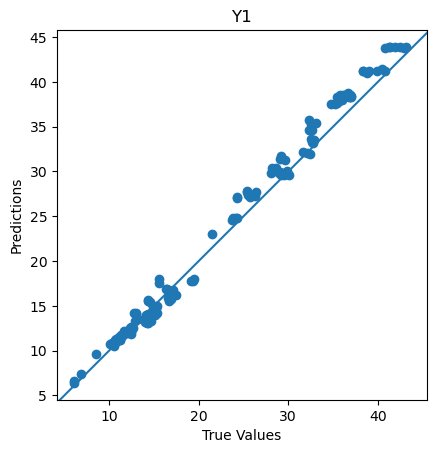

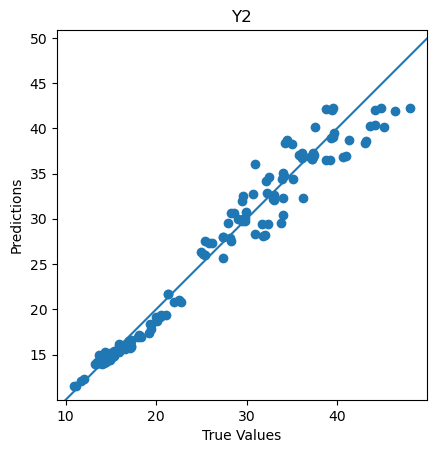

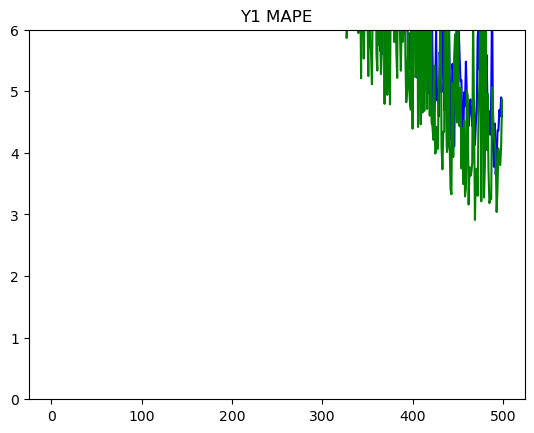

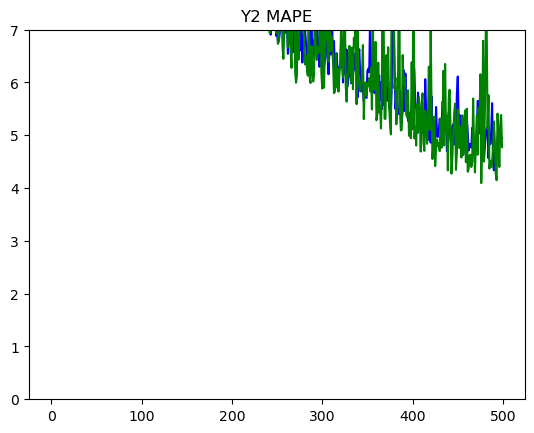

In [71]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_mean_absolute_percentage_error', title='Y1 MAPE', ylim=6)
plot_metrics(metric_name='y2_output_mean_absolute_percentage_error', title='Y2 MAPE', ylim=7)